## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

## 8-2 한글 자연어 처리 기초

### 꼬꼬마 모듈 (Kkma)

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

* 문장 분석

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~')

['한국어 분석을 시작합니다', '재미있어요~']

In [3]:
kkma.sentences('한국어 분석을 시작할거에요 재미있어요~')

['한국어 분석을 시작할 거에요 재미있어요~']

* 명사 분석

In [4]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석']

* 형태소 분석

In [5]:
kkma.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작하', 'ㅂ니다', '재미있', '어요', '~']

In [6]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

### 한나눔 모듈 (Hannanum)

In [7]:
from konlpy.tag import Hannanum

In [8]:
hannanum = Hannanum()

* 명사 분석

In [9]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '시작']

* 형태소 분석

In [10]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~']

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~', 'S')]

### 트위터 분석 (Twitter)

In [12]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


* 명사 분석

In [13]:
t.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '시작']

* 형태소 분석

In [14]:
t.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~']

In [15]:
t.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~', 'Punctuation')]

## 8-4 육아휴직 관련 법안에 대한 분석

In [41]:
import nltk
from konlpy.corpus import kobill

In [42]:
files_to = kobill.fileids()
doc_ko = open('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/1809890.txt', encoding = 'utf-8').read()

In [299]:
doc_ko[:100]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이'

In [44]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko[:10]

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의']

In [45]:
ko = nltk.Text(tokens_ko, name = '대한민국 국회 의안 제 1809890호')

In [46]:
print(len(ko.tokens))  # token의 수
print(len(set(ko.tokens)))   # unique한 token의 수
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

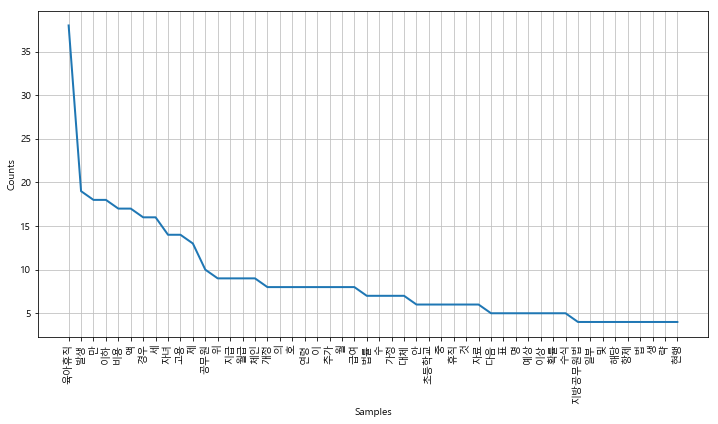

In [47]:
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

* 의미 없는 단어 제거

In [300]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').',
              'x', '의', '자', '에', '안', '번', '호', '을',
              '이', '다', '만', '로', '가', '를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['어버이날', '선물', '새싹삼', '준비', '해봤어요', '안마', '의자', '팬텀', '2', '어버이날']

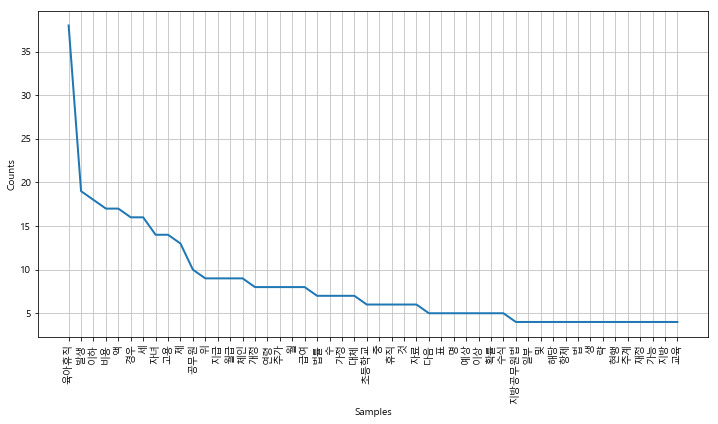

In [49]:
ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [50]:
ko.count('육아휴직')  # 특정단어가 몇번 언급되었는지 확인

38

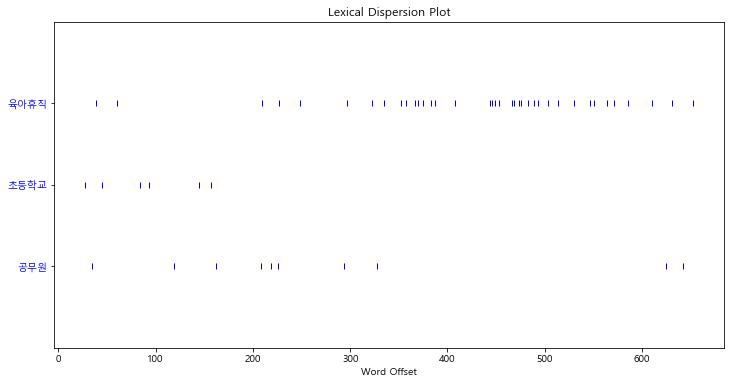

In [51]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

* 원하는 단어의 문서 내 위치 찾기

In [57]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


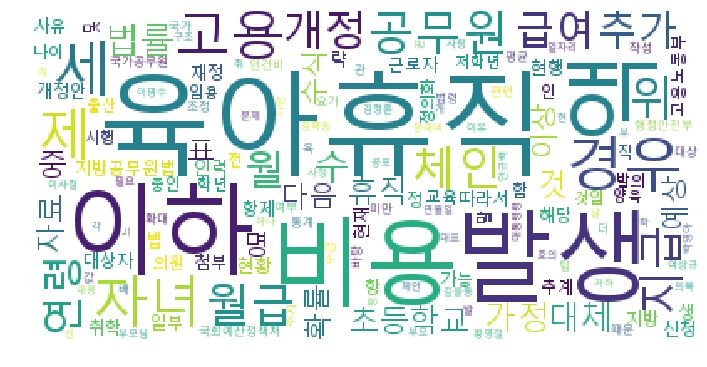

In [65]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = 'C:/Windows/Font/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color = 'white').generate_from_frequencies(dict(data))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 8-5 Naive Bayes Classifier의 이해

In [66]:
from nltk.tokenize import word_tokenize
import nltk

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [104]:
train = [('i like you', 'pos'),
         ('i hate you', 'neg'), 
         ('you like me', 'neg'), 
         ('i like her', 'pos')]

* 말뭉치 만들기

In [105]:
all_words = set(word.lower()  for sentence in train  for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

* 말뭉치를 기준으로 문장에 속한 단어인지 아닌지 기록

In [106]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t[0]

({'her': False,
  'you': True,
  'i': True,
  'like': True,
  'me': False,
  'hate': False},
 'pos')

In [92]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


In [93]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower() :
                      (word in word_tokenize(test_sentence.lower()))
                      for word in all_words}
test_sent_features

{'her': False,
 'you': False,
 'i': True,
 'like': True,
 'me': False,
 'hate': False}

In [94]:
classifier.classify(test_sent_features)

'pos'

## 8-6 Naive Bayes Classifier의 이해-한글

In [98]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [107]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [108]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [109]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t[0]

({'지루해': False,
  '마치고': False,
  '난': False,
  '고양이야': False,
  '메리는': False,
  '놀거야': False,
  '고양이도': False,
  '좋아': True,
  '메리가': True,
  '메리랑': False,
  '수업이': False,
  '이쁜': False},
 'pos')

In [110]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0


In [111]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {word.lower() : (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'지루해': False,
 '마치고': False,
 '난': True,
 '고양이야': False,
 '메리는': False,
 '놀거야': True,
 '고양이도': False,
 '좋아': False,
 '메리가': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False}

In [112]:
classifier.classify(test_sent_features)

'neg'

In [113]:
def tokenize(doc) :
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm = True, stem = True)]

In [114]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [115]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [116]:
def term_exists(doc) :
    return {word : (word in set(doc)) for word in tokens}

In [118]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy[0]

({'메리/Noun': True,
  '가/Josa': True,
  '좋다/Adjective': True,
  '고양이/Noun': False,
  '도/Josa': False,
  '난/Noun': False,
  '수업/Noun': False,
  '이/Josa': False,
  '지루하다/Adjective': False,
  '는/Josa': False,
  '이쁘다/Adjective': False,
  '야/Josa': False,
  '마치/Noun': False,
  '고/Josa': False,
  '랑/Josa': False,
  '놀다/Verb': False},
 'pos')

In [120]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [121]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

In [122]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [123]:
test_sent_features = {word : (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [124]:
classifier.classify(test_sent_features)

'pos'

## 8-7 문장의 유사도 측정하기

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
vectorizer = CountVectorizer(min_df = 1)

In [127]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [128]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()  # 단어들은 feature로 잡는다

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [130]:
from konlpy.tag import Twitter
t = Twitter()

In [131]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [132]:
contents_for_vectorize = []

for content in contents_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word   
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [133]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [134]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [135]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [136]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [138]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

* 새로운 문장(new_post_vec)과 비교해야 할 문장(contents)의 거리 구하기

In [139]:
import scipy as sp

def dist_raw(v1, v2) :
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [140]:
best_doc = None
best_dist = 65535
best_i = None

In [141]:
for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f  : %s' %(i,d,contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

== Post 0 with dist=3.00  : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00  : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00  : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist=3.46  : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [142]:
print('Best post is %i, dist=%.2f' %(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist=1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [145]:
for i in range(0, len(contents)) :
    print(X.getrow(i).toarray())
    
print('--------------------------------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
--------------------------------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [146]:
def dist_norm(v1, v2) :
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [147]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    print('== Post %i with dist = %.2f : %s' %(i,d,contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

== Post 0 with dist = 1.28 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 0.42 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 0.89 : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist = 1.30 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [148]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


* TF(term frequency; 단어 빈도)
    + 특정 키워드가 문서 내에 얼마나 자주 등장하는지를 나타내는 값
    + 이 값이 클수록 문서에서 중요한 키워드라고 볼 수 있음
    
* DF(document frequency; 문서 빈도)
    + 특정 단어가 몇 개의 문서에서 출현하는지를 나타내는 값
    + 어떤 단어가 문서 집합 내에서 빈번하게 사용되는 것은 그 단어가 흔하다는 것을 의미하기도 함
    
* IDF(inverse document frequency; 문서 빈도의 역수)
    + DF의 역수에 로그를 취한 값
    + N은 전체 문서 수
    
* TF-IDF = TF * log(N/DF)

In [149]:
def tfidf(t,d,D) :
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf, idf

In [152]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]
print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1, decode_error = 'ignore')

In [154]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [155]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [156]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요']

In [159]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [161]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    print('== Post %i with dist = %.2f : %s' %(i,d,contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

print('Best post is %i, dist = %.2f' %(best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist = 0.90 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 1.18 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 1.16 : 메리는 공원에서 노는 것도 싫어해요. 이상해요
== Post 3 with dist = 1.41 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8 어버이날 선물 고르기

In [162]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else :
    print('Unknown system')

plt.rcParams['axes.unicode_minus'] = False

In [163]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [228]:
tmp1 = 'https://search.naver.com/search.naver?'
html = tmp1 + '&query={key_word}&sm=tab_pge&srchby=all&st=sim&where=post&start={num}'
response = urlopen(html.format(num = 1, key_word = urllib.parse.quote('어버이날 선물')))
soup = BeautifulSoup(response, 'html.parser')
tmp = soup.find_all('dt')

In [229]:
for blog in tmp[3:] :
    print(blog.find('a')['title'])

어버이날 선물은 새싹삼 으로 준비해봤어요.
안마의자 팬텀2 어버이날선물 체험후기
어버이날선물 이색 세트 아침 굶지마시도록!
어버이날 부모님 선물 이거 어때? 테라헤르츠 팔찌 예쁘다
서초동 교대역 꽃집 규희플라워에서 어버이날 꽃바구니 선물 준비했어요.
어버이날 선물 침향원으로 준비했어요!
어버이날 선물 안마의자 치곤 부담 없었던 에버조이 한달 사용기!
어버이날선물추천 유기농노니 주스로 마음 전하기
어버이날 선물 역시, 홍삼~!  가성비 갑 새벽마을홍삼 픽!
<어버이날 선물기획전> 서재걸유산균/녹용보감/홍삼품은장어/안마기/프라우반 베개/라이프스트림 등...문성실이 엄선한 어버이날 선물을 공동구매 가격으로 만나보세요~~^^


In [230]:
tmp_list = []
for blog in tmp[3:] :
    tmp_list.append(blog.text)
tmp_list

['어버이날 선물은 새싹삼 으로 준비해봤어요.',
 '안마의자 팬텀2 어버이날선물 체험후기',
 '어버이날선물 이색 세트 아침 굶지마시도록!',
 '어버이날 부모님 선물 이거 어때? 테라헤르츠 팔찌 예쁘다',
 '서초동 교대역 꽃집 규희플라워에서 어버이날 꽃바구니 선물...',
 '어버이날 선물 침향원으로 준비했어요!',
 '어버이날 선물 안마의자 치곤 부담 없었던 에버조이 한달 사용기!',
 '어버이날선물추천 유기농노니 주스로 마음 전하기',
 '어버이날 선물 역시, 홍삼~! 가성비 갑 새벽마을홍삼 픽!',
 '<어버이날 선물기획전... 문성실이 엄선한 어버이날 선물을...']

In [264]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1,400,10)) :
    response = urlopen(html.format(num = n,
                                   key_word = urllib.parse.quote('어버이날 선물')))
    soup = BeautifulSoup(response, 'html.parser')
    tmp = soup.find_all('dt')
    for blog in tmp[3:] :
        present_candi_text.append(blog.text)
    time.sleep(0.5)

In [265]:
present_candi_text[:10]

['어버이날 선물은 새싹삼 으로 준비해봤어요.',
 '안마의자 팬텀2 어버이날선물 체험후기',
 '어버이날선물 이색 세트 아침 굶지마시도록!',
 '어버이날 부모님 선물 이거 어때? 테라헤르츠 팔찌 예쁘다',
 '서초동 교대역 꽃집 규희플라워에서 어버이날 꽃바구니 선물...',
 '어버이날 선물 침향원으로 준비했어요!',
 '어버이날 선물 안마의자 치곤 부담 없었던 에버조이 한달 사용기!',
 '어버이날선물추천 유기농노니 주스로 마음 전하기',
 '어버이날 선물 역시, 홍삼~! 가성비 갑 새벽마을홍삼 픽!',
 '<어버이날 선물기획전... 문성실이 엄선한 어버이날 선물을...']

In [266]:
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [267]:
present_text = ''
for each_line in present_candi_text :
    present_text = present_text + each_line

In [268]:
tokens_ko = t.morphs(present_text)
tokens_ko[:10]

['어버이날', '선물', '은', '새싹삼', '으로', '준비', '해봤어요', '.', '안마', '의자']

In [269]:
ko = nltk.Text(tokens_ko, name = '어버이날 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

4176
1212


In [301]:
ko = nltk.Text(tokens_ko, name = '어버이날 선물')
ko.vocab().most_common(10)

[('선물', 444),
 ('어버이날', 404),
 ('추천', 145),
 ('카네이션', 53),
 ('부모님', 47),
 ('준비', 30),
 ('홍삼', 28),
 ('꽃집', 27),
 ('플라워', 27),
 ('박스', 26)]

In [302]:
stop_words = ['.', '!', ',', '...', '[', ']', '하세요', '하는', '드려요', '<', '(', ')', '더',
              '도', '요', '제', '~', '했어요', '은', '이', '로', '/', '-', '거', "'", ':)', '을',
              '에', '대', '해요', '더', '원', '기', '의', '한', '?', '에서', '으로', '달', '오',
              '고', '형', '딱', '홍', '가', '정', '어때', '있는', '위', '점', '액', '아', '장',
              ':' ,'!!', '화', '편', '날', '디', '퓨저', '::', '있게', '과', '공']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name = '어버이날 선물')
ko.vocab().most_common(10)

[('선물', 444),
 ('어버이날', 404),
 ('추천', 145),
 ('카네이션', 53),
 ('부모님', 47),
 ('준비', 30),
 ('홍삼', 28),
 ('꽃집', 27),
 ('플라워', 27),
 ('박스', 26)]

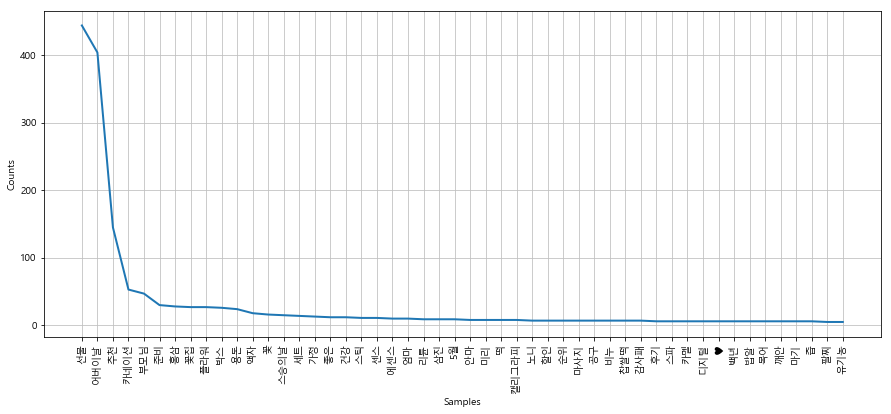

In [276]:
plt.figure(figsize = (15,6))
ko.plot(50)
plt.show()

In [278]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

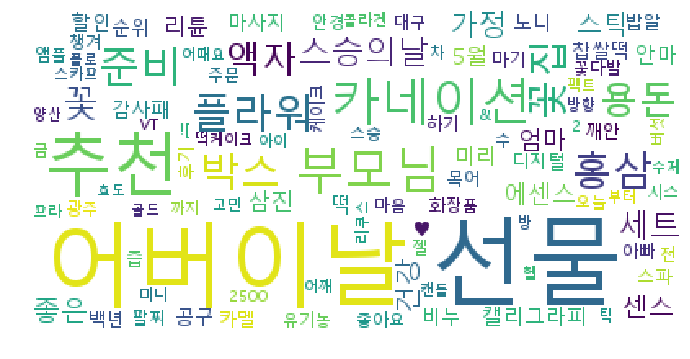

In [292]:
data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.4,
                      stopwords = stop_words,
                      background_color = 'white').generate_from_frequencies(dict(data))

plt.figure(figsize = (12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [293]:
mask = np.array(Image.open('../09. heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

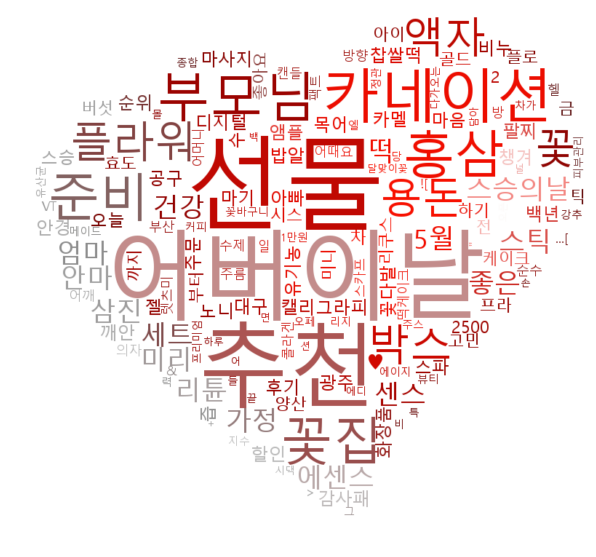

In [297]:
data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1,
                      stopwords = stop_words,
                      mask = mask,
                      background_color = 'white').generate_from_frequencies(dict(data))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud.recolor(color_func = image_colors),
           interpolation = 'bilinear')
plt.axis('off')
plt.show()